In [1]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer

In [2]:
import pandas as pd
import nltk
import numpy as np

In [304]:
sub = pd.read_csv('subway_with_reviews.csv') 
fire = pd.read_csv('firehouse_with_reviews.csv') 
jer = pd.read_csv('jersey_mike_with_reviews.csv') 
jim = pd.read_csv('jimmy_johns_with_reviews.csv') 
pot = pd.read_csv('potbelly_with_reviews.csv') 
quiz = pd.read_csv('Quiznos_with_reviews.csv') 
jim

,Unnamed: 0,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,...,categories,hours,review_id,user_id,stars_y,useful,funny,cool,text,date
0,0,sNDXKUS14_xXdD0fJdw23g,Jimmy John's,"6260 Intech Commons Rd, Ste C",Indianapolis,IN,46278,39.880535,-86.271365,3.5,...,"Restaurants, Fast Food, Delis, Sandwiches","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",ci0yPDPMU-Ca0MMK3pnZ7g,FfqnMS16PhYcXucWnIscgA,5,0,0,0,Freaky fast as always. Got the JJ Gargantuan ...,2016-06-23 00:23:28
1,1,sNDXKUS14_xXdD0fJdw23g,Jimmy John's,"6260 Intech Commons Rd, Ste C",Indianapolis,IN,46278,39.880535,-86.271365,3.5,...,"Restaurants, Fast Food, Delis, Sandwiches","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",2ls76hn6XxDDsjg1X_dIXw,upNymfeFMFO6d5r4uy_Nkw,5,0,0,0,"These people are so nice, as we came in a work...",2017-03-27 22:47:12
2,2,sNDXKUS14_xXdD0fJdw23g,Jimmy John's,"6260 Intech Commons Rd, Ste C",Indianapolis,IN,46278,39.880535,-86.271365,3.5,...,"Restaurants, Fast Food, Delis, Sandwiches","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",chLP2s9EZjyztIrP5NSe2Q,s4X6u7XTJOdtjWIlU9QeBg,1,0,1,0,I'm not quite sure if these are in new custome...,2017-05-18 00:26:42
3,3,sNDXKUS14_xXdD0fJdw23g,Jimmy John's,"6260 Intech Commons Rd, Ste C",Indianapolis,IN,46278,39.880535,-86.271365,3.5,...,"Restaurants, Fast Food, Delis, Sandwiches","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",jSd4EOl991w-gHGA0wMsRQ,hL8Os05NS3en1OWRgj-TSw,2,0,0,0,I've stopped by this location a few times beca...,2017-07-30 23:12:39
4,4,sNDXKUS14_xXdD0fJdw23g,Jimmy John's,"6260 Intech Commons Rd, Ste C",Indianapolis,IN,46278,39.880535,-86.271365,3.5,...,"Restaurants, Fast Food, Delis, Sandwiches","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",T6llH07KSBp_c4fEyt1umw,FdIiFCp5vPcFyWGn6_qf-Q,4,0,0,2,You can say freaky good! I am glad that Jimmy...,2016-06-16 17:01:33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4579,4579,Eb8LrlDzv1vMX8KC6QDDpQ,Jimmy John's,1257 Bruce B Downs Blvd,Wesley Chapel,FL,33544,28.174618,-82.354259,3.0,...,"Restaurants, Fast Food, Food, Delis, Sandwiche...","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'...",ybTGoUB7OwkdL6K5HzlHGw,4trPi9WRI2W06uqtw3OUDg,2,0,0,0,"Ugh.... The smell of an old, dirty mop is back...",2017-07-28 09:43:54
4580,4580,Eb8LrlDzv1vMX8KC6QDDpQ,Jimmy John's,1257 Bruce B Downs Blvd,Wesley Chapel,FL,33544,28.174618,-82.354259,3.0,...,"Restaurants, Fast Food, Food, Delis, Sandwiche...","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'...",6Nx_5oUHSP9NeJ6D_ARa6g,Vpdh7-lZu5EblAIuV69LFA,1,0,0,0,Just a few things that make Jimmy John's terri...,2021-05-03 14:21:49
4581,4581,Eb8LrlDzv1vMX8KC6QDDpQ,Jimmy John's,1257 Bruce B Downs Blvd,Wesley Chapel,FL,33544,28.174618,-82.354259,3.0,...,"Restaurants, Fast Food, Food, Delis, Sandwiche...","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'...",5OW6l4G358PQtEuG2hCAgw,a6fJNQT9Y-1wlohTa7dEOA,1,1,0,0,"Normally, I'm a big Jimmy John's fan. I especi...",2019-10-27 18:19:36
4582,4582,Eb8LrlDzv1vMX8KC6QDDpQ,Jimmy John's,1257 Bruce B Downs Blvd,Wesley Chapel,FL,33544,28.174618,-82.354259,3.0,...,"Restaurants, Fast Food, Food, Delis, Sandwiche...","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'...",_9OmG1r3YylvZhcFWiyMGQ,SsZiFqajPAO5LEOqQLCwPw,5,1,0,1,Haven't been to a Jimmy Johns in awhile so I s...,2020-01-30 17:29:43


In [305]:
sub['brand'] = 'Subway'
fire['brand'] = 'Firehouse Subs'
jer['brand'] = 'Jersey Mike\'s Subs'
jim['brand'] = 'Jimmy John\'s'
pot['brand'] = 'Potbelly Sandwich Shop'
quiz['brand'] = 'Quiznos'

In [306]:
sub = pd.concat([sub, fire, jer, jim, pot, quiz])
sub

,Unnamed: 0,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,...,hours,review_id,user_id,stars_y,useful,funny,cool,text,date,brand
0,0,VZzivJEbmHItOxNXJB3SpA,Subway,"330 Franklin Rd, Ste 900-d",Brentwood,TN,37027,36.026363,-86.789473,2.5,...,"{'Monday': '9:0-22:0', 'Tuesday': '9:0-22:0', ...",WBq2S1dhTme48WSYtk-Mkg,fVup-p6mgIMuWzNIj-CS1Q,1,0,0,0,"Do not eat here. First of all, it took them ab...",12/4/2016 22:28,Subway
1,1,VZzivJEbmHItOxNXJB3SpA,Subway,"330 Franklin Rd, Ste 900-d",Brentwood,TN,37027,36.026363,-86.789473,2.5,...,"{'Monday': '9:0-22:0', 'Tuesday': '9:0-22:0', ...",f-0P4HgQvtFR4OQgT-kFqQ,Lw6rx2yyzUbnFMUiD-Mk3Q,5,1,0,0,"Great food, clean establishment, and quick ser...",4/22/2017 6:24,Subway
2,2,VZzivJEbmHItOxNXJB3SpA,Subway,"330 Franklin Rd, Ste 900-d",Brentwood,TN,37027,36.026363,-86.789473,2.5,...,"{'Monday': '9:0-22:0', 'Tuesday': '9:0-22:0', ...",8OCbRtYMBu3sm8jZXMQxiA,Fh4gvyRoRjtYBhdTL6dDBg,2,1,0,0,Been standing here 15 min now. Three people ah...,3/23/2014 22:19,Subway
3,3,VZzivJEbmHItOxNXJB3SpA,Subway,"330 Franklin Rd, Ste 900-d",Brentwood,TN,37027,36.026363,-86.789473,2.5,...,"{'Monday': '9:0-22:0', 'Tuesday': '9:0-22:0', ...",89u5jcXM5M9zKLxzhgILkQ,KXDiP5LvmOIAH2M7rQyquw,2,0,0,0,Went over to Subway last evening their were 2 ...,1/11/2016 8:33,Subway
4,4,VZzivJEbmHItOxNXJB3SpA,Subway,"330 Franklin Rd, Ste 900-d",Brentwood,TN,37027,36.026363,-86.789473,2.5,...,"{'Monday': '9:0-22:0', 'Tuesday': '9:0-22:0', ...",Co8Kuvrsb_tiw4COwt3Izw,fVup-p6mgIMuWzNIj-CS1Q,1,0,0,0,Tried it again. Big mistake. I thought 2017 mi...,3/6/2017 22:30,Subway
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,319,xx8KU3Dp0heIDOcIzXOewQ,Quiznos,725 Campus Ct,Hazelwood,MO,63042,38.775479,-90.388340,4.5,...,"{'Monday': '0:0-0:0', 'Tuesday': '10:0-19:0', ...",pfeVcCj_HOe9bK3nN5K82g,Icoqtxs4WZGdWYxhkSjovQ,5,0,0,0,From what I know this is family owned and oper...,2018-11-03 18:16:24,Quiznos
320,320,xx8KU3Dp0heIDOcIzXOewQ,Quiznos,725 Campus Ct,Hazelwood,MO,63042,38.775479,-90.388340,4.5,...,"{'Monday': '0:0-0:0', 'Tuesday': '10:0-19:0', ...",CRwkpCKg8q3yN8B3sSdFSA,x8_WrbvIgqZ8-5BtJofc2Q,2,0,2,0,I use to go to the Quiznos in st. Charles on a...,2017-09-02 01:13:52,Quiznos
321,321,xx8KU3Dp0heIDOcIzXOewQ,Quiznos,725 Campus Ct,Hazelwood,MO,63042,38.775479,-90.388340,4.5,...,"{'Monday': '0:0-0:0', 'Tuesday': '10:0-19:0', ...",OkvyYXHhjqUWX1pAmobSxw,_V4EtVZ5KlCFIZ4U6nN7XQ,5,0,0,0,If you want the best sandwich experience you'v...,2020-02-06 21:45:19,Quiznos
322,322,xx8KU3Dp0heIDOcIzXOewQ,Quiznos,725 Campus Ct,Hazelwood,MO,63042,38.775479,-90.388340,4.5,...,"{'Monday': '0:0-0:0', 'Tuesday': '10:0-19:0', ...",5A-7dzFGxCUHeH5st8XEYg,TESUeCPNTpoovu7sJypdzw,5,1,0,0,"Oh Quizno's, how I missed you.\nThis restauran...",2013-05-16 00:31:16,Quiznos


In [7]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [6]:
import nltk
import ssl

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [7]:
stop_words = set(stopwords.words("english"))
stop_words.add("sandwich")
stop_wor
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [8]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [307]:
sub_clean = sub[['brand','address','business_id', 'city', 'state', 'stars_x', 'stars_y', 'text','useful', 'funny','cool']].copy()
sub_clean

,brand,address,business_id,city,state,stars_x,stars_y,text,useful,funny,cool
0,Subway,"330 Franklin Rd, Ste 900-d",VZzivJEbmHItOxNXJB3SpA,Brentwood,TN,2.5,1,"Do not eat here. First of all, it took them ab...",0,0,0
1,Subway,"330 Franklin Rd, Ste 900-d",VZzivJEbmHItOxNXJB3SpA,Brentwood,TN,2.5,5,"Great food, clean establishment, and quick ser...",1,0,0
2,Subway,"330 Franklin Rd, Ste 900-d",VZzivJEbmHItOxNXJB3SpA,Brentwood,TN,2.5,2,Been standing here 15 min now. Three people ah...,1,0,0
3,Subway,"330 Franklin Rd, Ste 900-d",VZzivJEbmHItOxNXJB3SpA,Brentwood,TN,2.5,2,Went over to Subway last evening their were 2 ...,0,0,0
4,Subway,"330 Franklin Rd, Ste 900-d",VZzivJEbmHItOxNXJB3SpA,Brentwood,TN,2.5,1,Tried it again. Big mistake. I thought 2017 mi...,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
319,Quiznos,725 Campus Ct,xx8KU3Dp0heIDOcIzXOewQ,Hazelwood,MO,4.5,5,From what I know this is family owned and oper...,0,0,0
320,Quiznos,725 Campus Ct,xx8KU3Dp0heIDOcIzXOewQ,Hazelwood,MO,4.5,2,I use to go to the Quiznos in st. Charles on a...,0,2,0
321,Quiznos,725 Campus Ct,xx8KU3Dp0heIDOcIzXOewQ,Hazelwood,MO,4.5,5,If you want the best sandwich experience you'v...,0,0,0
322,Quiznos,725 Campus Ct,xx8KU3Dp0heIDOcIzXOewQ,Hazelwood,MO,4.5,5,"Oh Quizno's, how I missed you.\nThis restauran...",1,0,0


In [46]:
#Sentiment
sia = SentimentIntensityAnalyzer()
sia.polarity_scores("Do not eat here. First of all, it took them about 3 weeks to fix their drink machine. Secondly, my coworkers and I got sick from eating here all on separate occasions. I feel like the employees there were not trained well too. They cant really make a good sandwich. I opened mine up and the meat fell everywhere. Maybe consider some better training and a quality of food check up. I generally like subway but this one has made me sick on multiple occasions.")

{'neg': 0.114, 'neu': 0.823, 'pos': 0.063, 'compound': -0.6556}

In [308]:
sub_clean['compound'] = [sia.polarity_scores(x)['compound'] for x in sub_clean['text']]
#sub_clean['neg'] = [sia.polarity_scores(x)['neg'] for x in sub_clean['text']]
#sub_clean['neu'] = [sia.polarity_scores(x)['neu'] for x in sub_clean['text']]
#sub_clean['pos'] = [sia.polarity_scores(x)['pos'] for x in sub_clean['text']]

In [70]:
#np.median(sub_clean[['stars_y', 'compound', 'pos', 'neu','neg']].loc[sub_clean.stars_y == 5].compound)

0.9293

In [309]:
sub_clean

,brand,address,business_id,city,state,stars_x,stars_y,text,useful,funny,cool,compound
0,Subway,"330 Franklin Rd, Ste 900-d",VZzivJEbmHItOxNXJB3SpA,Brentwood,TN,2.5,1,"Do not eat here. First of all, it took them ab...",0,0,0,-0.6556
1,Subway,"330 Franklin Rd, Ste 900-d",VZzivJEbmHItOxNXJB3SpA,Brentwood,TN,2.5,5,"Great food, clean establishment, and quick ser...",1,0,0,0.9217
2,Subway,"330 Franklin Rd, Ste 900-d",VZzivJEbmHItOxNXJB3SpA,Brentwood,TN,2.5,2,Been standing here 15 min now. Three people ah...,1,0,0,0.0258
3,Subway,"330 Franklin Rd, Ste 900-d",VZzivJEbmHItOxNXJB3SpA,Brentwood,TN,2.5,2,Went over to Subway last evening their were 2 ...,0,0,0,0.0000
4,Subway,"330 Franklin Rd, Ste 900-d",VZzivJEbmHItOxNXJB3SpA,Brentwood,TN,2.5,1,Tried it again. Big mistake. I thought 2017 mi...,0,0,0,-0.8151
...,...,...,...,...,...,...,...,...,...,...,...,...
319,Quiznos,725 Campus Ct,xx8KU3Dp0heIDOcIzXOewQ,Hazelwood,MO,4.5,5,From what I know this is family owned and oper...,0,0,0,0.8007
320,Quiznos,725 Campus Ct,xx8KU3Dp0heIDOcIzXOewQ,Hazelwood,MO,4.5,2,I use to go to the Quiznos in st. Charles on a...,0,2,0,-0.7869
321,Quiznos,725 Campus Ct,xx8KU3Dp0heIDOcIzXOewQ,Hazelwood,MO,4.5,5,If you want the best sandwich experience you'v...,0,0,0,0.9763
322,Quiznos,725 Campus Ct,xx8KU3Dp0heIDOcIzXOewQ,Hazelwood,MO,4.5,5,"Oh Quizno's, how I missed you.\nThis restauran...",1,0,0,0.9469


In [310]:
df2 = sub_clean[['brand','state', 'stars_y','address', 'text', 'compound']]
df2

,brand,state,stars_y,address,text,compound
0,Subway,TN,1,"330 Franklin Rd, Ste 900-d","Do not eat here. First of all, it took them ab...",-0.6556
1,Subway,TN,5,"330 Franklin Rd, Ste 900-d","Great food, clean establishment, and quick ser...",0.9217
2,Subway,TN,2,"330 Franklin Rd, Ste 900-d",Been standing here 15 min now. Three people ah...,0.0258
3,Subway,TN,2,"330 Franklin Rd, Ste 900-d",Went over to Subway last evening their were 2 ...,0.0000
4,Subway,TN,1,"330 Franklin Rd, Ste 900-d",Tried it again. Big mistake. I thought 2017 mi...,-0.8151
...,...,...,...,...,...,...
319,Quiznos,MO,5,725 Campus Ct,From what I know this is family owned and oper...,0.8007
320,Quiznos,MO,2,725 Campus Ct,I use to go to the Quiznos in st. Charles on a...,-0.7869
321,Quiznos,MO,5,725 Campus Ct,If you want the best sandwich experience you'v...,0.9763
322,Quiznos,MO,5,725 Campus Ct,"Oh Quizno's, how I missed you.\nThis restauran...",0.9469


In [311]:
import string
df2['pre'] = df2.text.str.replace('[^\w\s]','')
df2['pre'] = df2["pre"].str.lower()
df2["pre"] = df2["pre"].apply(word_tokenize)
df2

/var/folders/n8/bmp058_50fqcqx7j8qt4cr2w0000gn/T/ipykernel_39765/2904471083.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df2['pre'] = df2.text.str.replace('[^\w\s]','')
/var/folders/n8/bmp058_50fqcqx7j8qt4cr2w0000gn/T/ipykernel_39765/2904471083.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['pre'] = df2.text.str.replace('[^\w\s]','')
/var/folders/n8/bmp058_50fqcqx7j8qt4cr2w0000gn/T/ipykernel_39765/2904471083.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

,brand,state,stars_y,address,text,compound,pre
0,Subway,TN,1,"330 Franklin Rd, Ste 900-d","Do not eat here. First of all, it took them ab...",-0.6556,"[do, not, eat, here, first, of, all, it, took,..."
1,Subway,TN,5,"330 Franklin Rd, Ste 900-d","Great food, clean establishment, and quick ser...",0.9217,"[great, food, clean, establishment, and, quick..."
2,Subway,TN,2,"330 Franklin Rd, Ste 900-d",Been standing here 15 min now. Three people ah...,0.0258,"[been, standing, here, 15, min, now, three, pe..."
3,Subway,TN,2,"330 Franklin Rd, Ste 900-d",Went over to Subway last evening their were 2 ...,0.0000,"[went, over, to, subway, last, evening, their,..."
4,Subway,TN,1,"330 Franklin Rd, Ste 900-d",Tried it again. Big mistake. I thought 2017 mi...,-0.8151,"[tried, it, again, big, mistake, i, thought, 2..."
...,...,...,...,...,...,...,...
319,Quiznos,MO,5,725 Campus Ct,From what I know this is family owned and oper...,0.8007,"[from, what, i, know, this, is, family, owned,..."
320,Quiznos,MO,2,725 Campus Ct,I use to go to the Quiznos in st. Charles on a...,-0.7869,"[i, use, to, go, to, the, quiznos, in, st, cha..."
321,Quiznos,MO,5,725 Campus Ct,If you want the best sandwich experience you'v...,0.9763,"[if, you, want, the, best, sandwich, experienc..."
322,Quiznos,MO,5,725 Campus Ct,"Oh Quizno's, how I missed you.\nThis restauran...",0.9469,"[oh, quiznos, how, i, missed, you, this, resta..."


In [312]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

ls = []
for index,row in df2.iterrows():
    list = []
    for word in row["pre"]:
        if word.casefold() not in stop_words:
            list.append(word)
    #list = [word for word in list if not any(c.isdigit() for c in word)] ####keep the digits
    #list = [stemmer.stem(word) for word in list]
    list = [lemmatizer.lemmatize(word) for word in list]
    list = [word for word in list if len(word) > 1]
    row["pre"] = list
    ls.append(list)
df2["pre"] = ls

/var/folders/n8/bmp058_50fqcqx7j8qt4cr2w0000gn/T/ipykernel_39765/3042456255.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["pre"] = ls


In [313]:
df2 = df2.reset_index()
df2.drop(['index'], axis=1, inplace=True)
df2

,brand,state,stars_y,address,text,compound,pre
0,Subway,TN,1,"330 Franklin Rd, Ste 900-d","Do not eat here. First of all, it took them ab...",-0.6556,"[eat, first, took, week, fix, drink, machine, ..."
1,Subway,TN,5,"330 Franklin Rd, Ste 900-d","Great food, clean establishment, and quick ser...",0.9217,"[great, food, clean, establishment, quick, ser..."
2,Subway,TN,2,"330 Franklin Rd, Ste 900-d",Been standing here 15 min now. Three people ah...,0.0258,"[standing, 15, min, three, people, ahead, one,..."
3,Subway,TN,2,"330 Franklin Rd, Ste 900-d",Went over to Subway last evening their were 2 ...,0.0000,"[went, subway, last, evening, employee, store,..."
4,Subway,TN,1,"330 Franklin Rd, Ste 900-d",Tried it again. Big mistake. I thought 2017 mi...,-0.8151,"[tried, big, mistake, thought, 2017, might, he..."
...,...,...,...,...,...,...,...
15011,Quiznos,MO,5,725 Campus Ct,From what I know this is family owned and oper...,0.8007,"[know, family, owned, operated, take, pride, f..."
15012,Quiznos,MO,2,725 Campus Ct,I use to go to the Quiznos in st. Charles on a...,-0.7869,"[use, go, quiznos, st, charles, weekly, basis,..."
15013,Quiznos,MO,5,725 Campus Ct,If you want the best sandwich experience you'v...,0.9763,"[want, best, experience, youve, ever, definite..."
15014,Quiznos,MO,5,725 Campus Ct,"Oh Quizno's, how I missed you.\nThis restauran...",0.9469,"[oh, quiznos, missed, restaurant, used, open, ..."


In [314]:
from nltk.util import ngrams
#list(nltk.bigrams(nltk_tokens))
#df2['bigram'] = [bigram for bigram in nltk.bigrams(df2.pre)]
df2['bigram'] = df2['pre'].apply(lambda row: [bigram for bigram in nltk.bigrams(row)]  )
df2

,brand,state,stars_y,address,text,compound,pre,bigram
0,Subway,TN,1,"330 Franklin Rd, Ste 900-d","Do not eat here. First of all, it took them ab...",-0.6556,"[eat, first, took, week, fix, drink, machine, ...","[(eat, first), (first, took), (took, week), (w..."
1,Subway,TN,5,"330 Franklin Rd, Ste 900-d","Great food, clean establishment, and quick ser...",0.9217,"[great, food, clean, establishment, quick, ser...","[(great, food), (food, clean), (clean, establi..."
2,Subway,TN,2,"330 Franklin Rd, Ste 900-d",Been standing here 15 min now. Three people ah...,0.0258,"[standing, 15, min, three, people, ahead, one,...","[(standing, 15), (15, min), (min, three), (thr..."
3,Subway,TN,2,"330 Franklin Rd, Ste 900-d",Went over to Subway last evening their were 2 ...,0.0000,"[went, subway, last, evening, employee, store,...","[(went, subway), (subway, last), (last, evenin..."
4,Subway,TN,1,"330 Franklin Rd, Ste 900-d",Tried it again. Big mistake. I thought 2017 mi...,-0.8151,"[tried, big, mistake, thought, 2017, might, he...","[(tried, big), (big, mistake), (mistake, thoug..."
...,...,...,...,...,...,...,...,...
15011,Quiznos,MO,5,725 Campus Ct,From what I know this is family owned and oper...,0.8007,"[know, family, owned, operated, take, pride, f...","[(know, family), (family, owned), (owned, oper..."
15012,Quiznos,MO,2,725 Campus Ct,I use to go to the Quiznos in st. Charles on a...,-0.7869,"[use, go, quiznos, st, charles, weekly, basis,...","[(use, go), (go, quiznos), (quiznos, st), (st,..."
15013,Quiznos,MO,5,725 Campus Ct,If you want the best sandwich experience you'v...,0.9763,"[want, best, experience, youve, ever, definite...","[(want, best), (best, experience), (experience..."
15014,Quiznos,MO,5,725 Campus Ct,"Oh Quizno's, how I missed you.\nThis restauran...",0.9469,"[oh, quiznos, missed, restaurant, used, open, ...","[(oh, quiznos), (quiznos, missed), (missed, re..."


In [315]:
df2.compound.min ()

-0.9974

In [166]:
all_bi = df2['bigram'][0]
for i in range(1, 15016):
    all_bi = all_bi + df2['bigram'][i]
len(all_bi)

618741

In [167]:
counts = pd.Series(all_bi).value_counts()
counts.to_csv('bigram_word_count_stop.csv')
counts.head(30)

(jimmy, john)          2706
(jersey, mike)         1592
(customer, service)    1326
(first, time)           668
(freaky, fast)          574
(every, time)           492
(behind, counter)       446
(go, back)              438
(firehouse, sub)        430
(roast, beef)           414
(fast, food)            400
(mike, way)             354
(dont, know)            349
(staff, friendly)       345
(sub, shop)             344
(ive, ever)             330
(meat, cheese)          328
(lettuce, tomato)       319
(come, back)            302
(even, though)          301
(next, time)            298
(food, good)            281
(last, time)            257
(ive, never)            254
(friendly, staff)       253
(pretty, good)          253
(cheese, steak)         252
(really, good)          249
(hot, pepper)           249
(feel, like)            245
dtype: int64

In [168]:
#df2['compound'] = [sia.polarity_scores(x)['compound'] for x in df2['text']]
#df2

In [58]:
sia.polarity_scores(sub_clean.iloc[472].text)

{'neg': 0.045, 'neu': 0.829, 'pos': 0.125, 'compound': 0.9741}

In [48]:
#word = ['mistake']
#np.median(df2[df2['pre'].apply(lambda x: any([w in x for w in word]))].compound)

-0.1793

In [191]:
def get_sentiment(target):
    sum = 0
    count = 0
    for index,row in df2.iterrows():
        for tup in row['bigram']:
            if tup == target: 
                
                sum = sum+row['compound']
                count = count+1
            
    return (sum/count)

In [247]:
def get_sen_median(target):
    list = []
    i=[]
    #df2[target] = -1
    for index,row in df2.iterrows():
        
        found = False
        for tup in row['bigram']:
            if tup == target: 
                list.append(row['compound'])
                found = True
            
        if found == True:
            i.append(index)
            #print(index)
            
    return i ,np.median(list)

In [288]:
tup = ('roast', 'beef')
def add_bigram_count(tup):
    name = '_'.join(tup)
    #df2.drop([name], axis=1, inplace=True)
    df2[name] = 0
    index, sentiment = get_sen_median(tup)
    #print(index)
    df2[name][index]=1
    df2[df2[name] == 1]

In [316]:
df2

,brand,state,stars_y,address,text,compound,pre,bigram
0,Subway,TN,1,"330 Franklin Rd, Ste 900-d","Do not eat here. First of all, it took them ab...",-0.6556,"[eat, first, took, week, fix, drink, machine, ...","[(eat, first), (first, took), (took, week), (w..."
1,Subway,TN,5,"330 Franklin Rd, Ste 900-d","Great food, clean establishment, and quick ser...",0.9217,"[great, food, clean, establishment, quick, ser...","[(great, food), (food, clean), (clean, establi..."
2,Subway,TN,2,"330 Franklin Rd, Ste 900-d",Been standing here 15 min now. Three people ah...,0.0258,"[standing, 15, min, three, people, ahead, one,...","[(standing, 15), (15, min), (min, three), (thr..."
3,Subway,TN,2,"330 Franklin Rd, Ste 900-d",Went over to Subway last evening their were 2 ...,0.0000,"[went, subway, last, evening, employee, store,...","[(went, subway), (subway, last), (last, evenin..."
4,Subway,TN,1,"330 Franklin Rd, Ste 900-d",Tried it again. Big mistake. I thought 2017 mi...,-0.8151,"[tried, big, mistake, thought, 2017, might, he...","[(tried, big), (big, mistake), (mistake, thoug..."
...,...,...,...,...,...,...,...,...
15011,Quiznos,MO,5,725 Campus Ct,From what I know this is family owned and oper...,0.8007,"[know, family, owned, operated, take, pride, f...","[(know, family), (family, owned), (owned, oper..."
15012,Quiznos,MO,2,725 Campus Ct,I use to go to the Quiznos in st. Charles on a...,-0.7869,"[use, go, quiznos, st, charles, weekly, basis,...","[(use, go), (go, quiznos), (quiznos, st), (st,..."
15013,Quiznos,MO,5,725 Campus Ct,If you want the best sandwich experience you'v...,0.9763,"[want, best, experience, youve, ever, definite...","[(want, best), (best, experience), (experience..."
15014,Quiznos,MO,5,725 Campus Ct,"Oh Quizno's, how I missed you.\nThis restauran...",0.9469,"[oh, quiznos, missed, restaurant, used, open, ...","[(oh, quiznos), (quiznos, missed), (missed, re..."


In [277]:
#df2.drop(tup, axis=1, inplace=True)

In [286]:
add_bigram_count(tup)
df2[df2['roast_beef'] == 1]

/var/folders/n8/bmp058_50fqcqx7j8qt4cr2w0000gn/T/ipykernel_39765/2444260887.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[name][index]=1


,state,stars_y,address,text,compound,pre,bigram,roast_beef
6,TN,4,"330 Franklin Rd, Ste 900-d",Subway has tasty lower-fat sandwiches for Bren...,0.9806,"[subway, tasty, lowerfat, sandwich, brentwood,...","[(subway, tasty), (tasty, lowerfat), (lowerfat...",1
47,TN,1,99 White Bridge Rd,"Come on Subway, for what you charge I expect m...",-0.3105,"[come, subway, charge, expect, dozen, tiny, th...","[(come, subway), (subway, charge), (charge, ex...",1
301,ID,1,182 E State St,"I've had bad service at this location before, ...",-0.8968,"[ive, bad, service, location, thought, id, giv...","[(ive, bad), (bad, service), (service, locatio...",1
592,FL,3,"8019 W Hillsborough Ave, Unit A",I don't know if Jared started me going to Subw...,0.8425,"[dont, know, jared, started, going, subway, de...","[(dont, know), (know, jared), (jared, started)...",1
648,AZ,5,"2955 W Valencia Rd, Ste 101","I eat at Subway often, and the people who work...",0.9648,"[eat, subway, often, people, work, amazing, ja...","[(eat, subway), (subway, often), (often, peopl...",1
...,...,...,...,...,...,...,...,...
14717,NV,5,"2905 Northtowne Ln, Ste 120","Always been a Quiznos fan, what's not to love!...",0.9921,"[always, quiznos, fan, whats, love, black, ang...","[(always, quiznos), (quiznos, fan), (fan, what...",1
14774,AZ,2,"10785 N Oracle Rd, Suite 167",Sneaky! --that's the word that I use to descr...,0.9820,"[sneaky, thats, word, use, describe, quiznos, ...","[(sneaky, thats), (thats, word), (word, use), ...",1
14919,TN,5,319 Peabody St,Chicken pesto ceasar and roast beef and horser...,0.9563,"[chicken, pesto, ceasar, roast, beef, horserad...","[(chicken, pesto), (pesto, ceasar), (ceasar, r...",1
14941,NV,3,219 N Center St,Surprisingly the food is decently priced for t...,0.7639,"[surprisingly, food, decently, priced, restaur...","[(surprisingly, food), (food, decently), (dece...",1


In [317]:
tuples = [('customer', 'service'), ('freaky', 'fast'), ('roast', 'beef'), ('staff', 'friendly'), ('meat', 'cheese'), ('hot', 'sauce')
         , ('fresh', 'bread'), ('lettuce', 'tomato'), ('cheese', 'steak'), ('hot', 'pepper'), ('meatball', 'sub'), ('drive', 'thru'), ('great', 'service')
         , ('italian', 'sub'), ('online', 'order'), ('10', 'minute'),('15', 'minute'), ('20', 'minute'), ('30', 'minute'), 
         ('bag', 'chip'), ('one', 'star'), ('wont', 'back'), ('turkey', 'bacon'),('big', 'kahuna'), ('order', 'wrong')]
for tup in tuples:
    #print(tup,': ', get_sentiment(tup))
    add_bigram_count(tup)
    print(tup,': ', get_sen_median(tup)[1])
    #print("-----------")

/var/folders/n8/bmp058_50fqcqx7j8qt4cr2w0000gn/T/ipykernel_39765/395087516.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[name][index]=1


('customer', 'service') :  0.6285000000000001


/var/folders/n8/bmp058_50fqcqx7j8qt4cr2w0000gn/T/ipykernel_39765/395087516.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[name][index]=1


('freaky', 'fast') :  0.5041


/var/folders/n8/bmp058_50fqcqx7j8qt4cr2w0000gn/T/ipykernel_39765/395087516.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[name][index]=1


('roast', 'beef') :  0.9314


/var/folders/n8/bmp058_50fqcqx7j8qt4cr2w0000gn/T/ipykernel_39765/395087516.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[name][index]=1


('staff', 'friendly') :  0.9186


/var/folders/n8/bmp058_50fqcqx7j8qt4cr2w0000gn/T/ipykernel_39765/395087516.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[name][index]=1


('meat', 'cheese') :  0.9246


/var/folders/n8/bmp058_50fqcqx7j8qt4cr2w0000gn/T/ipykernel_39765/395087516.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[name][index]=1


('hot', 'sauce') :  0.9337


/var/folders/n8/bmp058_50fqcqx7j8qt4cr2w0000gn/T/ipykernel_39765/395087516.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[name][index]=1


('fresh', 'bread') :  0.92625


/var/folders/n8/bmp058_50fqcqx7j8qt4cr2w0000gn/T/ipykernel_39765/395087516.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[name][index]=1


('lettuce', 'tomato') :  0.9287


/var/folders/n8/bmp058_50fqcqx7j8qt4cr2w0000gn/T/ipykernel_39765/395087516.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[name][index]=1


('cheese', 'steak') :  0.93555


/var/folders/n8/bmp058_50fqcqx7j8qt4cr2w0000gn/T/ipykernel_39765/395087516.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[name][index]=1


('hot', 'pepper') :  0.9136


/var/folders/n8/bmp058_50fqcqx7j8qt4cr2w0000gn/T/ipykernel_39765/395087516.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[name][index]=1


('meatball', 'sub') :  0.92015


/var/folders/n8/bmp058_50fqcqx7j8qt4cr2w0000gn/T/ipykernel_39765/395087516.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[name][index]=1


('drive', 'thru') :  0.5829


/var/folders/n8/bmp058_50fqcqx7j8qt4cr2w0000gn/T/ipykernel_39765/395087516.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[name][index]=1


('great', 'service') :  0.9316


/var/folders/n8/bmp058_50fqcqx7j8qt4cr2w0000gn/T/ipykernel_39765/395087516.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[name][index]=1


('italian', 'sub') :  0.92415


/var/folders/n8/bmp058_50fqcqx7j8qt4cr2w0000gn/T/ipykernel_39765/395087516.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[name][index]=1


('online', 'order') :  0.0


/var/folders/n8/bmp058_50fqcqx7j8qt4cr2w0000gn/T/ipykernel_39765/395087516.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[name][index]=1


('10', 'minute') :  0.21034999999999998


/var/folders/n8/bmp058_50fqcqx7j8qt4cr2w0000gn/T/ipykernel_39765/395087516.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[name][index]=1


('15', 'minute') :  -0.0078


/var/folders/n8/bmp058_50fqcqx7j8qt4cr2w0000gn/T/ipykernel_39765/395087516.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[name][index]=1


('20', 'minute') :  0.0


/var/folders/n8/bmp058_50fqcqx7j8qt4cr2w0000gn/T/ipykernel_39765/395087516.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[name][index]=1


('30', 'minute') :  0.0


/var/folders/n8/bmp058_50fqcqx7j8qt4cr2w0000gn/T/ipykernel_39765/395087516.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[name][index]=1


('bag', 'chip') :  0.6379


/var/folders/n8/bmp058_50fqcqx7j8qt4cr2w0000gn/T/ipykernel_39765/395087516.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[name][index]=1


('one', 'star') :  -0.11465


/var/folders/n8/bmp058_50fqcqx7j8qt4cr2w0000gn/T/ipykernel_39765/395087516.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[name][index]=1


('wont', 'back') :  -0.2783


/var/folders/n8/bmp058_50fqcqx7j8qt4cr2w0000gn/T/ipykernel_39765/395087516.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[name][index]=1


('turkey', 'bacon') :  0.92435


/var/folders/n8/bmp058_50fqcqx7j8qt4cr2w0000gn/T/ipykernel_39765/395087516.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[name][index]=1


('big', 'kahuna') :  0.94365


/var/folders/n8/bmp058_50fqcqx7j8qt4cr2w0000gn/T/ipykernel_39765/395087516.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[name][index]=1


('order', 'wrong') :  -0.54985


In [318]:
df2.to_csv('full_data.csv')
df2

,brand,state,stars_y,address,text,compound,pre,bigram,customer_service,freaky_fast,...,10_minute,15_minute,20_minute,30_minute,bag_chip,one_star,wont_back,turkey_bacon,big_kahuna,order_wrong
0,Subway,TN,1,"330 Franklin Rd, Ste 900-d","Do not eat here. First of all, it took them ab...",-0.6556,"[eat, first, took, week, fix, drink, machine, ...","[(eat, first), (first, took), (took, week), (w...",0,0,...,0,0,0,0,0,0,0,0,0,0
1,Subway,TN,5,"330 Franklin Rd, Ste 900-d","Great food, clean establishment, and quick ser...",0.9217,"[great, food, clean, establishment, quick, ser...","[(great, food), (food, clean), (clean, establi...",0,0,...,0,0,0,0,0,0,0,0,0,0
2,Subway,TN,2,"330 Franklin Rd, Ste 900-d",Been standing here 15 min now. Three people ah...,0.0258,"[standing, 15, min, three, people, ahead, one,...","[(standing, 15), (15, min), (min, three), (thr...",0,0,...,0,0,0,0,0,0,0,0,0,0
3,Subway,TN,2,"330 Franklin Rd, Ste 900-d",Went over to Subway last evening their were 2 ...,0.0000,"[went, subway, last, evening, employee, store,...","[(went, subway), (subway, last), (last, evenin...",0,0,...,0,0,0,0,0,0,0,0,0,0
4,Subway,TN,1,"330 Franklin Rd, Ste 900-d",Tried it again. Big mistake. I thought 2017 mi...,-0.8151,"[tried, big, mistake, thought, 2017, might, he...","[(tried, big), (big, mistake), (mistake, thoug...",0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15011,Quiznos,MO,5,725 Campus Ct,From what I know this is family owned and oper...,0.8007,"[know, family, owned, operated, take, pride, f...","[(know, family), (family, owned), (owned, oper...",0,0,...,0,0,0,0,0,0,0,0,0,0
15012,Quiznos,MO,2,725 Campus Ct,I use to go to the Quiznos in st. Charles on a...,-0.7869,"[use, go, quiznos, st, charles, weekly, basis,...","[(use, go), (go, quiznos), (quiznos, st), (st,...",0,0,...,0,0,1,0,0,0,0,0,0,0
15013,Quiznos,MO,5,725 Campus Ct,If you want the best sandwich experience you'v...,0.9763,"[want, best, experience, youve, ever, definite...","[(want, best), (best, experience), (experience...",0,0,...,0,0,0,0,0,0,0,0,0,0
15014,Quiznos,MO,5,725 Campus Ct,"Oh Quizno's, how I missed you.\nThis restauran...",0.9469,"[oh, quiznos, missed, restaurant, used, open, ...","[(oh, quiznos), (quiznos, missed), (missed, re...",1,0,...,0,0,0,0,0,0,0,0,0,0


In [296]:
df3 = df2.copy()
df3

,state,stars_y,address,text,compound,pre,bigram,roast_beef,customer_service,freaky_fast,...,10_minute,15_minute,20_minute,30_minute,bag_chip,one_star,wont_back,turkey_bacon,big_kahuna,order_wrong
0,TN,1,"330 Franklin Rd, Ste 900-d","Do not eat here. First of all, it took them ab...",-0.6556,"[eat, first, took, week, fix, drink, machine, ...","[(eat, first), (first, took), (took, week), (w...",0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,TN,5,"330 Franklin Rd, Ste 900-d","Great food, clean establishment, and quick ser...",0.9217,"[great, food, clean, establishment, quick, ser...","[(great, food), (food, clean), (clean, establi...",0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,TN,2,"330 Franklin Rd, Ste 900-d",Been standing here 15 min now. Three people ah...,0.0258,"[standing, 15, min, three, people, ahead, one,...","[(standing, 15), (15, min), (min, three), (thr...",0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,TN,2,"330 Franklin Rd, Ste 900-d",Went over to Subway last evening their were 2 ...,0.0000,"[went, subway, last, evening, employee, store,...","[(went, subway), (subway, last), (last, evenin...",0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,TN,1,"330 Franklin Rd, Ste 900-d",Tried it again. Big mistake. I thought 2017 mi...,-0.8151,"[tried, big, mistake, thought, 2017, might, he...","[(tried, big), (big, mistake), (mistake, thoug...",0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15011,MO,5,725 Campus Ct,From what I know this is family owned and oper...,0.8007,"[know, family, owned, operated, take, pride, f...","[(know, family), (family, owned), (owned, oper...",0,0,0,...,0,0,0,0,0,0,0,0,0,0
15012,MO,2,725 Campus Ct,I use to go to the Quiznos in st. Charles on a...,-0.7869,"[use, go, quiznos, st, charles, weekly, basis,...","[(use, go), (go, quiznos), (quiznos, st), (st,...",0,0,0,...,0,0,1,0,0,0,0,0,0,0
15013,MO,5,725 Campus Ct,If you want the best sandwich experience you'v...,0.9763,"[want, best, experience, youve, ever, definite...","[(want, best), (best, experience), (experience...",0,0,0,...,0,0,0,0,0,0,0,0,0,0
15014,MO,5,725 Campus Ct,"Oh Quizno's, how I missed you.\nThis restauran...",0.9469,"[oh, quiznos, missed, restaurant, used, open, ...","[(oh, quiznos), (quiznos, missed), (missed, re...",0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
for index,row in df3.iterrows():
        row['Keywords'] = []
        found = False
        for tup in row['bigram']:
            if tup == target: 
                list.append(row['compound'])
                found = True

In [294]:
df2.columns

Index(['state', 'stars_y', 'address', 'text', 'compound', 'pre', 'bigram',
       'roast_beef', 'customer_service', 'freaky_fast', 'staff_friendly',
       'meat_cheese', 'hot_sauce', 'fresh_bread', 'lettuce_tomato',
       'cheese_steak', 'hot_pepper', 'meatball_sub', 'drive_thru',
       'great_service', 'italian_sub', 'online_order', '10_minute',
       '15_minute', '20_minute', '30_minute', 'bag_chip', 'one_star',
       'wont_back', 'turkey_bacon', 'big_kahuna', 'order_wrong'],
      dtype='object')

In [15]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

In [16]:
df = sub_clean[['address', 'stars_x', 'text']]
df

,address,stars_x,text
0,"330 Franklin Rd, Ste 900-d",2.5,"Do not eat here. First of all, it took them ab..."
1,"330 Franklin Rd, Ste 900-d",2.5,"Great food, clean establishment, and quick ser..."
2,"330 Franklin Rd, Ste 900-d",2.5,Been standing here 15 min now. Three people ah...
3,"330 Franklin Rd, Ste 900-d",2.5,Went over to Subway last evening their were 2 ...
4,"330 Franklin Rd, Ste 900-d",2.5,Tried it again. Big mistake. I thought 2017 mi...
...,...,...,...
319,725 Campus Ct,4.5,From what I know this is family owned and oper...
320,725 Campus Ct,4.5,I use to go to the Quiznos in st. Charles on a...
321,725 Campus Ct,4.5,If you want the best sandwich experience you'v...
322,725 Campus Ct,4.5,"Oh Quizno's, how I missed you.\nThis restauran..."


In [18]:
#df1 = df.groupby(['business_id','stars_x']).agg('text')
#df.combine = df.groupby(['business_id','stars_x'])['text'].transform(lambda x: ','.join(x))
df1 = df.groupby(['address','stars_x'])['text'].apply(','.join).reset_index()

df1

,address,stars_x,text
0,1 Brookings Dr,2.0,I repeated my order three times loudly and you...
1,1 Convention Ave,4.0,I don't know how fair this review will be cons...
2,1 Hermitage Ave,2.5,Came in because I was starving and needed some...
3,1 North Meridian,3.0,After eating at the Jimmy John's up on Lake Ci...
4,100 E Main St,3.0,Really wish it was possible to give negative b...
...,...,...,...
838,"Ronnie's Plz, Ste 38",2.0,"I've dined at this location alone, and with my..."
839,"Shepard Plz, Ste 2",2.5,We drove about 5 miles from the interstate int...
840,"Stadium Station, 8116 112th Ave",2.0,Teriyaki sweet onion sub is good. I got a 9inc...
841,"Terra Plaza, 12926 97 St",1.5,Got home and this is what I got.. so dry and h...


In [19]:
graph1 = df1
graph1 = graph1.rename(columns = {'stars_x': 'stars'})
graph1.text

0      I repeated my order three times loudly and you...
1      I don't know how fair this review will be cons...
2      Came in because I was starving and needed some...
3      After eating at the Jimmy John's up on Lake Ci...
4      Really wish it was possible to give negative b...
                             ...                        
838    I've dined at this location alone, and with my...
839    We drove about 5 miles from the interstate int...
840    Teriyaki sweet onion sub is good. I got a 9inc...
841    Got home and this is what I got.. so dry and h...
842    Owner confronted me about a survey completed w...
Name: text, Length: 843, dtype: object

In [38]:
import string
df1['pre'] = df1.text.str.replace('[^\w\s]','')
df1['pre'] = df1["pre"].str.lower()
df1["pre"] = df1["pre"].apply(word_tokenize)
df1

C:\Users\13522\AppData\Local\Temp\ipykernel_14292\2610643919.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['pre'] = df1.text.str.replace('[^\w\s]','')


,address,stars_x,text,pre
0,1 Brookings Dr,2.0,I repeated my order three times loudly and you...,"[i, repeated, my, order, three, times, loudly,..."
1,1 Convention Ave,4.0,I don't know how fair this review will be cons...,"[i, dont, know, how, fair, this, review, will,..."
2,1 Hermitage Ave,2.5,Came in because I was starving and needed some...,"[came, in, because, i, was, starving, and, nee..."
3,1 North Meridian,3.0,After eating at the Jimmy John's up on Lake Ci...,"[after, eating, at, the, jimmy, johns, up, on,..."
4,100 E Main St,3.0,Really wish it was possible to give negative b...,"[really, wish, it, was, possible, to, give, ne..."
...,...,...,...,...
838,"Ronnie's Plz, Ste 38",2.0,"I've dined at this location alone, and with my...","[ive, dined, at, this, location, alone, and, w..."
839,"Shepard Plz, Ste 2",2.5,We drove about 5 miles from the interstate int...,"[we, drove, about, 5, miles, from, the, inters..."
840,"Stadium Station, 8116 112th Ave",2.0,Teriyaki sweet onion sub is good. I got a 9inc...,"[teriyaki, sweet, onion, sub, is, good, i, got..."
841,"Terra Plaza, 12926 97 St",1.5,Got home and this is what I got.. so dry and h...,"[got, home, and, this, is, what, i, got, so, d..."


In [39]:
ls = []
for index,row in df1.iterrows():
    list = []
    for word in row["pre"]:
        if word.casefold() not in stop_words:
             list.append(word)
    list = [word for word in list if not any(c.isdigit() for c in word)]
    #list = [stemmer.stem(word) for word in list]
    list = [lemmatizer.lemmatize(word) for word in list]
    list = [word for word in list if len(word) > 1]
    row["pre"] = list
    ls.append(list)
df1["pre"] = ls
df1

,address,stars_x,text,pre
0,1 Brookings Dr,2.0,I repeated my order three times loudly and you...,"[repeated, order, three, time, loudly, still, ..."
1,1 Convention Ave,4.0,I don't know how fair this review will be cons...,"[dont, know, fair, review, considering, ive, e..."
2,1 Hermitage Ave,2.5,Came in because I was starving and needed some...,"[came, starving, needed, something, quick, got..."
3,1 North Meridian,3.0,After eating at the Jimmy John's up on Lake Ci...,"[eating, jimmy, john, lake, circle, drive, pla..."
4,100 E Main St,3.0,Really wish it was possible to give negative b...,"[really, wish, possible, give, negative, yelp,..."
...,...,...,...,...
838,"Ronnie's Plz, Ste 38",2.0,"I've dined at this location alone, and with my...","[ive, dined, location, alone, kid, service, al..."
839,"Shepard Plz, Ste 2",2.5,We drove about 5 miles from the interstate int...,"[drove, mile, interstate, subway, location, ma..."
840,"Stadium Station, 8116 112th Ave",2.0,Teriyaki sweet onion sub is good. I got a 9inc...,"[teriyaki, sweet, onion, sub, good, got, every..."
841,"Terra Plaza, 12926 97 St",1.5,Got home and this is what I got.. so dry and h...,"[got, home, got, dry, heavy, impressed, called..."


In [22]:
a = pd.Series(np.concatenate(df1['pre']))
a.value_counts().to_csv("total_word_count_v2.csv")

In [23]:
def add_word_count(word):
    word_count = []
    for index,row in df1.iterrows():
        word_count.append( row["pre"].count(word))
    df1[word] = word_count
    df1

In [24]:
add_word_count("clean")
df1

,address,stars_x,text,pre,clean
0,1 Brookings Dr,2.0,I repeated my order three times loudly and you...,"[repeated, order, three, time, loudly, still, ...",0
1,1 Convention Ave,4.0,I don't know how fair this review will be cons...,"[dont, know, fair, review, considering, ive, e...",4
2,1 Hermitage Ave,2.5,Came in because I was starving and needed some...,"[came, starving, needed, something, quick, got...",1
3,1 North Meridian,3.0,After eating at the Jimmy John's up on Lake Ci...,"[eating, jimmy, john, lake, circle, drive, pla...",3
4,100 E Main St,3.0,Really wish it was possible to give negative b...,"[really, wish, possible, give, negative, yelp,...",0
...,...,...,...,...,...
838,"Ronnie's Plz, Ste 38",2.0,"I've dined at this location alone, and with my...","[ive, dined, location, alone, kid, service, al...",2
839,"Shepard Plz, Ste 2",2.5,We drove about 5 miles from the interstate int...,"[drove, mile, interstate, subway, location, ma...",0
840,"Stadium Station, 8116 112th Ave",2.0,Teriyaki sweet onion sub is good. I got a 9inc...,"[teriyaki, sweet, onion, sub, good, got, every...",2
841,"Terra Plaza, 12926 97 St",1.5,Got home and this is what I got.. so dry and h...,"[got, home, got, dry, heavy, impressed, called...",1


In [25]:
df1.stars_x.astype("category")

C:\Users\13522\anaconda3\lib\site-packages\IPython\lib\pretty.py:700: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  output = repr(obj)


0      2.0
1      4.0
2      2.5
3      3.0
4      3.0
      ... 
838    2.0
839    2.5
840    2.0
841    1.5
842    1.5
Name: stars_x, Length: 843, dtype: category
Categories (9, float64): [1.0, 1.5, 2.0, 2.5, ..., 3.5, 4.0, 4.5, 5.0]

In [29]:
import matplotlib.pyplot as plt
def barPlot(word):
    plotdf = df1.groupby('stars_x')[word].sum()
    plotdf = plotdf.to_frame().reset_index()
    plt.bar(plotdf['stars_x'], plotdf[word])

In [30]:
def bar_plot(word):
    pre = df1.groupby('stars_x')[word].agg(["sum", "count"])
    
    pre['y'] = pre['sum']/pre['count']
    pre = pre.reset_index()
    print(pre)
    #pre['y_norm'] = (pre.y - pre.y.mean())/pre.y.std()
    pre['y_norm'] = (pre.y - pre.y.min())/(pre.y.max() - pre.y.min())
    fig, ax = plt.subplots(figsize =(2, 2))
    
    plt.xlabel("Stars")
    plt.ylabel("Normalized Frequency")
    plt.title(word)
    plt.bar(pre['stars_x'], pre.y_norm, width = 0.4)
    

   stars_x  sum  count         y
0      1.0    6      8  0.750000
1      1.5   49     62  0.790323
2      2.0   82    126  0.650794
3      2.5  118    192  0.614583
4      3.0  168    191  0.879581
5      3.5  247    164  1.506098
6      4.0  196     83  2.361446
7      4.5   10     16  0.625000
8      5.0    2      1  2.000000
   stars_x  sum  count         y
0      1.0    0      8  0.000000
1      1.5   23     62  0.370968
2      2.0   29    126  0.230159
3      2.5   60    192  0.312500
4      3.0  145    191  0.759162
5      3.5  201    164  1.225610
6      4.0  153     83  1.843373
7      4.5   11     16  0.687500
8      5.0    0      1  0.000000
   stars_x  sum  count         y
0      1.0    3      8  0.375000
1      1.5    5     62  0.080645
2      2.0   19    126  0.150794
3      2.5   65    192  0.338542
4      3.0  161    191  0.842932
5      3.5  225    164  1.371951
6      4.0  111     83  1.337349
7      4.5   14     16  0.875000
8      5.0    0      1  0.000000
   stars_x

<Figure size 640x480 with 0 Axes>

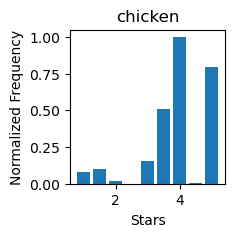

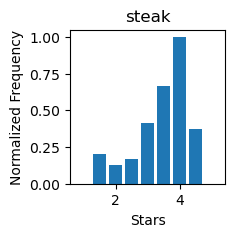

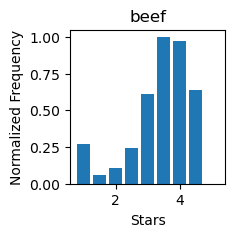

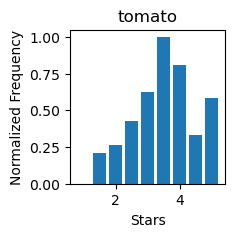

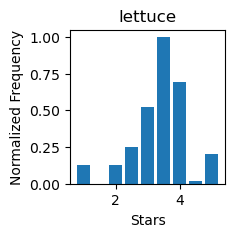

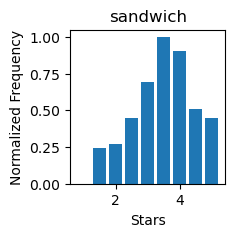

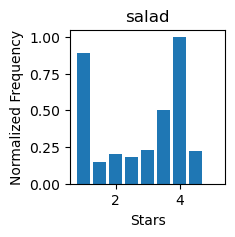

In [31]:
plot_list = ["chicken", "steak", "beef", "tomato", "lettuce", "sandwich", "salad"]
plt.figure()
for word in plot_list:
    
    add_word_count(word)
    bar_plot(word)
plt.show()


   stars_x  sum  count         y
0      1.0    3      8  0.375000
1      1.5   26     62  0.419355
2      2.0   49    126  0.388889
3      2.5   80    192  0.416667
4      3.0   87    191  0.455497
5      3.5   75    164  0.457317
6      4.0   23     83  0.277108
7      4.5    2     16  0.125000
8      5.0    0      1  0.000000
   stars_x  sum  count         y
0      1.0    3      8  0.375000
1      1.5   40     62  0.645161
2      2.0  153    126  1.214286
3      2.5  299    192  1.557292
4      3.0  366    191  1.916230
5      3.5  477    164  2.908537
6      4.0  272     83  3.277108
7      4.5   43     16  2.687500
8      5.0    3      1  3.000000
   stars_x   sum  count          y
0      1.0     4      8   0.500000
1      1.5   106     62   1.709677
2      2.0   303    126   2.404762
3      2.5   669    192   3.484375
4      3.0  1198    191   6.272251
5      3.5  1545    164   9.420732
6      4.0   862     83  10.385542
7      4.5    78     16   4.875000
8      5.0     3      1  

<Figure size 640x480 with 0 Axes>

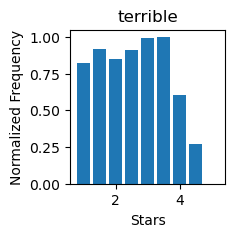

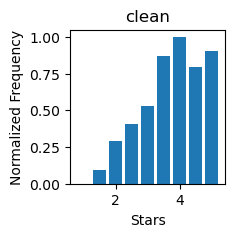

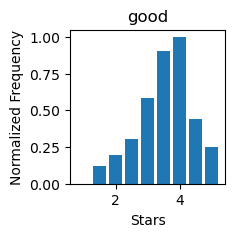

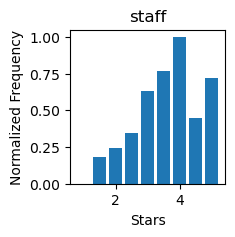

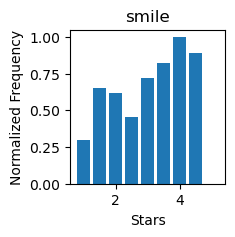

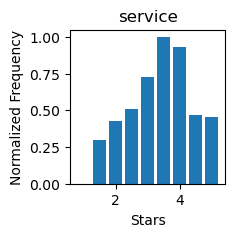

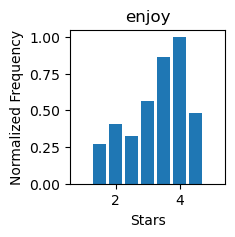

In [32]:
plot_list = ["terrible", "clean", "good", "staff", "smile", "service", "enjoy"]
plt.figure()
for word in plot_list:
    
    add_word_count(word)
    bar_plot(word)
plt.show()


   stars_x  sum  count         y
0      1.0   17      8  2.125000
1      1.5  179     62  2.887097
2      2.0  380    126  3.015873
3      2.5  600    192  3.125000
4      3.0  784    191  4.104712
5      3.5  757    164  4.615854
6      4.0  280     83  3.373494
7      4.5   31     16  1.937500
8      5.0    0      1  0.000000
   stars_x   sum  count         y
0      1.0     3      8  0.375000
1      1.5    95     62  1.532258
2      2.0   291    126  2.309524
3      2.5   591    192  3.078125
4      3.0   863    191  4.518325
5      3.5  1079    164  6.579268
6      4.0   560     83  6.746988
7      4.5    68     16  4.250000
8      5.0     3      1  3.000000
   stars_x  sum  count         y
0      1.0   19      8  2.375000
1      1.5  173     62  2.790323
2      2.0  312    126  2.476190
3      2.5  536    192  2.791667
4      3.0  551    191  2.884817
5      3.5  549    164  3.347561
6      4.0  224     83  2.698795
7      4.5   15     16  0.937500
8      5.0    0      1  0.000000


<Figure size 640x480 with 0 Axes>

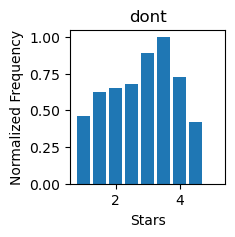

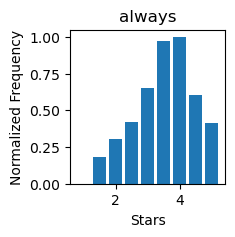

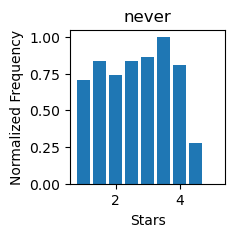

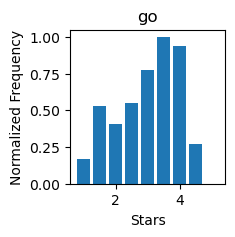

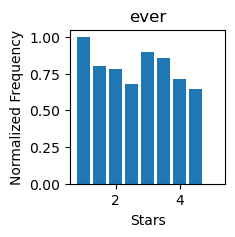

In [33]:
plot_list = ["dont", "always", "never", "go", "ever"]
plt.figure()
for word in plot_list:
    
    add_word_count(word)
    bar_plot(word)
plt.show()


Text(0.5, 1.0, 'Distribution of Stars for All Subways')

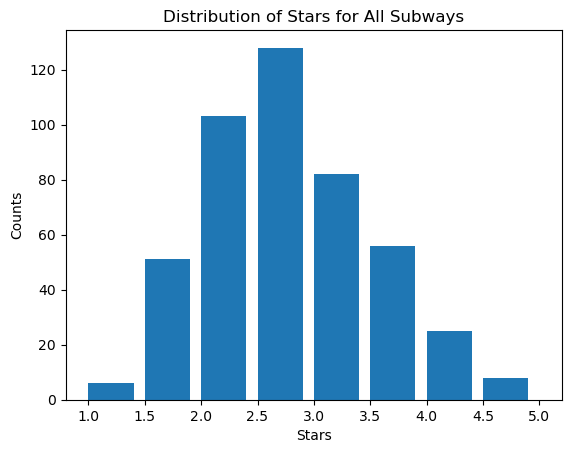

In [62]:
plt.hist(df1.stars_x, bins=[1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0], width = 0.4)
plt.xlabel("Stars")
plt.ylabel("Counts")
plt.title("Distribution of Stars for All Subways")

In [55]:
df1

,address,stars_x,text,pre
0,1 Brookings Dr,2.0,I repeated my order three times loudly and you...,"[repeated, order, three, time, loudly, still, ..."
1,1 Convention Ave,4.0,I don't know how fair this review will be cons...,"[dont, know, fair, review, considering, ive, e..."
2,1 Hermitage Ave,2.5,Came in because I was starving and needed some...,"[came, starving, needed, something, quick, got..."
3,1 North Meridian,3.0,After eating at the Jimmy John's up on Lake Ci...,"[eating, jimmy, john, lake, circle, drive, pla..."
4,100 E Main St,3.0,Really wish it was possible to give negative b...,"[really, wish, possible, give, negative, yelp,..."
...,...,...,...,...
838,"Ronnie's Plz, Ste 38",2.0,"I've dined at this location alone, and with my...","[ive, dined, location, alone, kid, service, al..."
839,"Shepard Plz, Ste 2",2.5,We drove about 5 miles from the interstate int...,"[drove, mile, interstate, subway, location, ma..."
840,"Stadium Station, 8116 112th Ave",2.0,Teriyaki sweet onion sub is good. I got a 9inc...,"[teriyaki, sweet, onion, sub, good, got, every..."
841,"Terra Plaza, 12926 97 St",1.5,Got home and this is what I got.. so dry and h...,"[got, home, got, dry, heavy, impressed, called..."


<BarContainer object of 9 artists>

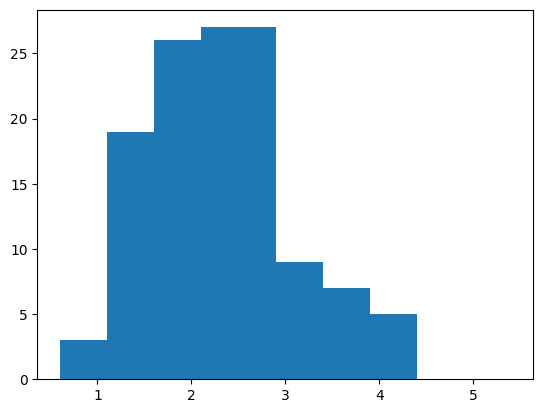

In [259]:
df1['terribl_bin'] = np.where(df1["terribl"] > 0, 1, 0)
plotdf = df1.groupby('stars_x')['terribl_bin'].sum()
plotdf = plotdf.to_frame().reset_index()
plt.bar(plotdf['stars_x'], plotdf['terribl_bin'])

In [250]:
df1.to_csv('df1.csv')